# Preliminaries

My starting point is the following table, created by Chantal.
The table is read from a Google Drive spreadsheet: https://docs.google.com/spreadsheets/d/1zG5cf-OGpDV_VbfQXOuLZj1EZ6RuK1JhPRAW0ZTIG3M/edit#gid=0

In [1]:
import json
import gspread
import numpy as np
from oauth2client.client import SignedJwtAssertionCredentials
from alchemyapi import AlchemyAPI
import csv
import pandas as pd
    
alchemyapi = AlchemyAPI()

json_key = json.load(open('first-c75c55e52243.json'))
scope = ['https://spreadsheets.google.com/feeds']

credentials = SignedJwtAssertionCredentials(json_key['client_email'], json_key['private_key'].encode(), scope)

gc = gspread.authorize(credentials)

pd.DataFrame(gc.open("vaccinations_meta").sheet1.get_all_values())

,0,1,2,3,4,5,6,7,8
0,id,Internet Archive,Title,Organization/site name,Genre,Stance,publishing date,archiving date,URL
1,1,https://web.archive.org/web/20150503220412/htt...,"Disney, Measles and the Fantasyland of Vaccine...",Age of Autism,news?,con,12-4-2015,3-5-2015,http://www.ageofautism.com/2015/01/disney-meas...
2,2,https://web.archive.org/web/20150906024829/htt...,Only 14% of people in Disneyland measles outbr...,Natural News,news?,con,14-4-2015,6-9-2015,http://www.naturalnews.com/049351_measles_outb...
3,3,https://web.archive.org/web/20151012091835/htt...,VaxTruth.org | Measles at Disneyland!,VaxTruth,blog,con,8-1-2015,12-10-2015,http://vaxtruth.org/2015/01/measles/
4,4,https://web.archive.org/web/20150730162421/htt...,"Say it ain't so, Mickey! A holiday measles out...",Science-based Medicine,blog,pro,12-1-2015,30-6-2015,https://www.sciencebasedmedicine.org/say-it-ai...
5,5,https://web.archive.org/web/20150905093115/htt...,"Measles — United States, January 4–April 2, 2015",Centers for Disease Control and Prevention,report,pro,17-4-2015,5-8-2015,http://www.cdc.gov/mmwr/preview/mmwrhtml/mm641...
6,6,https://web.archive.org/web/20150818195231/htt...,Disneyland measles outbreak linked to low vacc...,NY Daily News,news,pro,6-4-2015,18-8-2015,http://www.nydailynews.com/life-style/health/d...
7,7,https://web.archive.org/web/20150817012959/htt...,Low Vaccination Rates To Blame for Disneyland ...,California Healthcare Foundation,news?,pro,17-3-2015,17-8-2015,http://www.californiahealthline.org/articles/2...
8,8,https://web.archive.org/web/20150909233007/htt...,Low Vaccination Rates Likely Behind Disney Mea...,HealthDay,news?,pro,16-3-2015,9-9-2015,http://www.webmd.com/children/vaccines/news/20...
9,9,https://web.archive.org/web/20151028153056/htt...,California Department of Public Health Confirm...,California Department of Public Health,report,pro,7-1-2015,28-10-2015,http://www.cdph.ca.gov/Pages/NR15-002.aspx


# First analysis: Sentiment analysis vs. stance

Here I use AlchemyAPI to compute the sentiment of the vaccine documents (represented as a number between -1, negative and 1, positive). I do then look for a correlation with stance (pro, con, neutral are represented as +1, -1 and 0). 

Correlations:
Pearson 0.403768375505
Kendall 0.348817393971
Spearman 0.440612954395


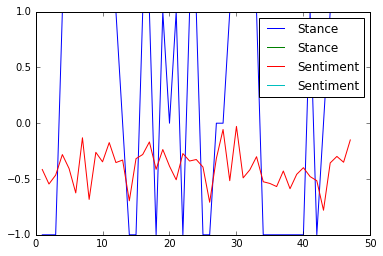

(47, 1)
(47,)
0.906666666667


In [3]:
%matplotlib inline

import pandas as pd
import gspread
import numpy as np
from oauth2client.client import SignedJwtAssertionCredentials
from alchemyapi import AlchemyAPI
import csv
import ast
import matplotlib.pyplot as pl
import json

json_key = json.load(open('first-c75c55e52243.json'))
scope = ['https://spreadsheets.google.com/feeds']

credentials = SignedJwtAssertionCredentials(json_key['client_email'], json_key['private_key'].encode(), scope)

gc = gspread.authorize(credentials)

wks = gc.open("vaccinations_meta").sheet1

sh = pd.DataFrame.from_items([("index",wks.col_values(1)),("urls",wks.col_values(2)),("genre",wks.col_values(5)),("pubdate",wks.col_values(7))])
sh = sh.set_index("urls")

df = pd.read_csv("vaccines_data.csv", sep=",",quotechar="\"",header=0,index_col=1)

df = pd.concat([df,sh],axis=1,join_axes=[df.index])

print "Correlations:"
print "Pearson", df['sentiment'].corr(df['stance'].apply(lambda x: 1 if x.startswith("pro") else -1 if x.startswith("con") else 0))
print "Kendall", df['sentiment'].corr(df['stance'].apply(lambda x: 1 if x.startswith("pro") else -1 if x.startswith("con") else 0),method="kendall")
print "Spearman", df['sentiment'].corr(df['stance'].apply(lambda x: 1 if x.startswith("pro") else -1 if x.startswith("con") else 0),method="spearman")

pl.plot(df['index'],df['stance'].apply(lambda x: 1 if x.startswith("pro") else -1 if x.startswith("con") else 0),label="Stance")
pl.plot(df['index'],df['sentiment'],label="Sentiment")
pl.legend()
pl.show()

from sklearn.linear_model import SGDClassifier
from sklearn import cross_validation
import numpy 

X = numpy.array(df.sentiment.tolist())
X = X.reshape((len(X),1))
y = numpy.array([x for x in df.stance.apply(lambda x: 1 if x.startswith("pro") else 1 if x.startswith("con") else 0).tolist()])
clf = SGDClassifier(alpha=0.00005, n_iter=1000)
print X.shape
print y.shape
clf.fit(X, y)
scores = cross_validation.cross_val_score(clf, X, y, cv=10)
print numpy.mean(scores)

# NLP Analyses

I use all AlchemyAPI available analyses (sentiment, concept extraction, relation extraction, keyword detection, entity extraction and taxonomy detection). The following cell shows an example of output for one document and for two analyses (Concept and keywork extraction). 

In [6]:
from alchemyapi import AlchemyAPI
alchemyapi = AlchemyAPI()
import json
import pprint

url = "https://web.archive.org/web/20150503220412/http://www.ageofautism.com/2015/01/disney-measles-and-the-fantasyland-of-vaccine-perfection.html"
response = alchemyapi.emotion("url", url)
pp = pprint.PrettyPrinter(indent=4)
print "Emotion: "
pp.pprint(response)
print(response['docEmotions'])


Emotion: 
{   u'docEmotions': {   u'anger': u'0.416209',
                        u'disgust': u'0.294655',
                        u'fear': u'0.000425',
                        u'joy': u'2e-06',
                        u'sadness': u'0.001793'},
    u'language': u'english',
    u'status': u'OK',
    u'totalTransactions': u'0',
    u'url': u'https://web.archive.org/web/20150503220412/http://www.ageofautism.com/2015/01/disney-measles-and-the-fantasyland-of-vaccine-perfection.html',
    u'usage': u'By accessing AlchemyAPI or using information generated by AlchemyAPI, you are agreeing to be bound by the AlchemyAPI Terms of Use: http://www.alchemyapi.com/company/terms.html',
    u'warningMessage': u'truncated-oversized-text-content'}
{u'anger': u'0.416209', u'joy': u'2e-06', u'fear': u'0.000425', u'sadness': u'0.001793', u'disgust': u'0.294655'}


The following code performs all the analyses for all the documents. Results are represented in a table, where each row corresponds to a document. Each keyword, concept, relation, etc. is represented as a column: I put a zero in correspondence to document not showing that item. "Relevance" or "score" values are put in correspondence to documents that show that item, instead. "Relevance" and "score" range between 0 and 1.
So, in each document, we can see which entities, relations, etc. are present, and how important they are. This results in a big matrix with 48 rows and more than 4.000 columns.

In [7]:
import json
import gspread
import numpy as np
from oauth2client.client import SignedJwtAssertionCredentials
from alchemyapi import AlchemyAPI
import csv

    
alchemyapi = AlchemyAPI()

json_key = json.load(open('first-c75c55e52243.json'))
scope = ['https://spreadsheets.google.com/feeds']

credentials = SignedJwtAssertionCredentials(json_key['client_email'], json_key['private_key'].encode(), scope)

gc = gspread.authorize(credentials)

wks = gc.open("vaccinations_meta").sheet1

urls2 = wks.col_values(2)
urls2 = [x for x in urls2 if x.startswith("http")]
urls9 = wks.col_values(9)
urls9 = [x for x in urls9 if x.startswith("http")]

with open('vaccines_data.csv', 'wb') as csvfile:
    writer = csv.writer(csvfile, delimiter=',', quotechar='\"', quoting=csv.QUOTE_MINIMAL)
    writer.writerow(["index","url","stance","sentiment","taxonomy","relations","concepts","keywords","entities"])
    for i in range(0,len(urls2)):
        rs1 = alchemyapi.sentiment("url", urls2[i])
        rt1 = alchemyapi.taxonomy("url", urls2[i])
        rr1 = alchemyapi.relations("url", urls2[i])
        rc1 = alchemyapi.concepts("url", urls2[i])
        rk1 = alchemyapi.keywords("url", urls2[i])
        re1 = alchemyapi.entities("url", urls2[i])
        if(rs1['status'] == "OK"):
            rs = rs1['docSentiment']['score']
        else:
            rs2 = alchemyapi.sentiment("url", urls9[i])
            if(rs2['status'] == "OK"):
                rs = rs2['docSentiment']['score']
            else:
                rs = ""
        if(rt1['status'] == "OK"):
            rt = rt1['taxonomy']
        else:
            rt2 = alchemyapi.taxonomy("url", urls9[i])
            if(rt2['status'] == "OK"):
                rt = rt2['taxonomy']
            else:
                rt = ""
        if(rr1['status'] == "OK"):
            rr = rr1['relations']
        else:
            rr2 = alchemyapi.relations("url", urls9[i])
            if(rr2['status'] == "OK"):
                rr = rr2['relations']
            else:
                rr = ""
        if(rc1['status'] == "OK"):
            rc = rc1['concepts']
        else:
            rc2 = alchemyapi.concepts("url", urls9[i])
            if(rc2['status'] == "OK"):
                rc = rc2['concepts']
            else:
                rc = ""
        if(rk1['status'] == "OK"):
            rk = rk1['keywords']
        else:
            rk2 = alchemyapi.keywords("url", urls9[i])
            if(rk2['status'] == "OK"):
                rk = rk2['keywords']
            else:
                rk = ""
        if(re1['status'] == "OK"):
            re = re1['entities']
        else:
            re2 = alchemyapi.entities("url", urls9[i])
            if(re2['status'] == "OK"):
                re = re2['entities']
            else:
                re = ""
        writer.writerow([i+1,urls9[i],wks.col_values(6)[i+1],rs,rt,rr,rc,rk,re])
                


# Current steps

Given the size of the matrix, I am working on dimensionality reduction. Below, you can see an attempt to Principal Component Analysis. This will be further developed.

In [5]:
import pandas as pd
import json
import ast
from sklearn.decomposition import PCA

df = pd.read_csv("vaccines_data.csv", sep=",",quotechar="\"",header=0,index_col=1)
df['concepts'] = df['concepts'].apply(lambda x: ast.literal_eval(x))
df['concepts'] = df['concepts'].apply(lambda y: [[x['dbpedia'],x['relevance']] for x in y])
for i in range(0,df['concepts'].count()):
    for x in df.iloc[i]['concepts']:
        if x[0] in df:
            df[x[0]].iloc[i] = x[1]
        else:
            df[x[0]] = pd.Series([0]*df['concepts'].count(), index=df.index)
            df[x[0]].iloc[i] = x[1]
df = df.drop('concepts', 1)
df['keywords'] = df['keywords'].apply(lambda x: ast.literal_eval(x))
df['keywords'] = df['keywords'].apply(lambda y: [[x['text'],x['relevance']] for x in y])
for i in range(0,df['keywords'].count()):
    for x in df.iloc[i]['keywords']:
        if x[0] in df:
            df[x[0]].iloc[i] = x[1]
        else:
            df[x[0]] = pd.Series([0]*df['keywords'].count(), index=df.index)
            df[x[0]].iloc[i] = x[1]
df = df.drop('keywords', 1)
df['entities'] = df['entities'].apply(lambda x: ast.literal_eval(x))
df['entities'] = df['entities'].apply(lambda y: [[x['text'],x['relevance']] for x in y])
for i in range(0,df['entities'].count()):
    for x in df.iloc[i]['entities']:
        if x[0] in df:
            df[x[0]].iloc[i] = x[1]
        else:
            df[x[0]] = pd.Series([0]*df['entities'].count(), index=df.index)
            df[x[0]].iloc[i] = x[1]
df = df.drop('entities', 1)
df['taxonomy'] = df['taxonomy'].apply(lambda x: ast.literal_eval(x))
df['taxonomy'] = df['taxonomy'].apply(lambda y: [[x['label'],x['score']] for x in y])
for i in range(0,df['taxonomy'].count()):
    for x in df.iloc[i]['taxonomy']:
        if x[0] in df:
            df[x[0]].iloc[i] = x[1]
        else:
            df[x[0]] = pd.Series([0]*df['taxonomy'].count(), index=df.index)
            df[x[0]].iloc[i] = x[1]
df = df.drop('taxonomy', 1)
df['relations'] = df['relations'].apply(lambda x: ast.literal_eval(x))
df['relations'] = df['relations'].apply(lambda y: [x['subject']['text']+"-"+x['action']['lemmatized']+("-"+x['object']['text'] if 'object' in x else "") for x in y])
for i in range(0,df['relations'].count()):
    for x in df.iloc[i]['relations']:
        if x in df:
            df[x].iloc[i] = 1
        else:
            df[x] = pd.Series([0]*df['relations'].count(), index=df.index)
            df[x].iloc[i] = 1
df = df.drop('relations', 1)


pca = PCA(n_components=5)
pca.fit(df.iloc[1:30,4::])
print pca.components_
pca.transform(df)

df.to_csv(path_or_buf="vaccines_data_augmented.csv", encoding='utf-8')




[[ 0.02828019  0.05026029  0.01010925 ...,  0.          0.          0.        ]
 [-0.12882596 -0.03092439  0.03277954 ...,  0.          0.          0.        ]
 [ 0.06884727  0.09062884 -0.01761266 ...,  0.          0.          0.        ]
 [ 0.05270291 -0.00655548 -0.02572577 ...,  0.          0.          0.        ]
 [-0.00856324  0.01929564  0.00460828 ...,  0.          0.          0.        ]]


/Users/dceolin/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


ValueError: operands could not be broadcast together with shapes (47,4283) (4279,) 

# Next Steps

Besides the NLP analyses, I am retrieving sources reputation using Web of Trust (WOT, https://www.mywot.com/), which provides website scores based on users reviews.

In [11]:
import urllib2
import json
import gspread
import numpy as np
from oauth2client.client import SignedJwtAssertionCredentials
from alchemyapi import AlchemyAPI
import csv
import requests
from urlparse import urlparse
import ast
import pandas as pd
    
alchemyapi = AlchemyAPI()

json_key = json.load(open('first-c75c55e52243.json'))
scope = ['https://spreadsheets.google.com/feeds']

credentials = SignedJwtAssertionCredentials(json_key['client_email'], json_key['private_key'].encode(), scope)

gc = gspread.authorize(credentials)

wks = gc.open("vaccinations_meta").sheet1
urls9 = wks.col_values(9)
urls9 = [x for x in urls9 if x.startswith("http")]
l =  [urlparse(x).netloc for x in urls9]
l = "/".join(l)

df = pd.read_csv("vaccines_data_augmented.csv", sep=",",quotechar="\"",header=0,index_col=1)
url="http://api.mywot.com/0.4/public_link_json2?hosts="+l+"/&callback=process&key=a636580936cfb8ad0b18dafafe1e5f50b803e0ca"
r = requests.get(url)
r =  urllib2.urlopen(url)
a = r.read()
#print eval(a[8:len(a)-1])
res = json.loads(a[8:len(a)-1])
df['trustworthiness'] = [0] * len(df)
df['child_safety'] = [0] * len(df)
df['malware'] = [0] * len(df)
df['poor_customer_experience'] = [0] * len(df)
df['phishing'] = [0] * len(df)
df['scam'] = [0] * len(df)
df['potentially_illegal'] = [0] * len(df)
df['misleading_claims'] = [0] * len(df)
df['privacy_risks'] = [0] * len(df)
df['suspicious'] = [0] * len(df)
df['discrimination'] = [0] * len(df)
df['spam'] = [0] * len(df)
df['potentially_unwanted_programs'] = [0] * len(df)
df['pop-ups'] = [0] * len(df)
df['online_tracking'] = [0] * len(df)
df['alternative_medicine'] = [0] * len(df)
df['opinions_religion_medicine'] = [0] * len(df)
df['other'] = [0] * len(df)
df['adult_content'] = [0] * len(df)
df['incidental_nudity'] = [0] * len(df)
df['shocking'] = [0] * len(df)
df['site_for_kids'] = [0] * len(df)

for i in range(0,df['url'].count()):
    data = res[urlparse(df['url'].iloc[i]).netloc]
    try:
        df['trustworthiness'].iloc[i] = data['0'][0] if '0' in data else 0
        df['child_safety'].iloc[i] = data['4'][0] if '4' in data else 0
        df['malware'].iloc[i] =  data['categories'][101] if '101' in data['categories'] else 0
        df['poor_customer_experience'].iloc[i] = data['categories'][102] if '102' in data['categories'] else 0
        df['phishing'].iloc[i] = data['categories'][103] if '103' in data['categories'] else 0
        df['scam'].iloc[i] = data['categories'][104] if '104' in data['categories'] else 0
        df['potentially_illegal'].iloc[i] = data['categories'][105] if '105' in data['categories'] else 0
        df['misleading_claims'].iloc[i] = data['categories'][201] if '201' in data['categories'] else 0
        df['privacy_risks'].iloc[i] = data['categories'][202] if '202' in data['categories'] else 0
        df['suspicious'].iloc[i] = data['categories'][203] if '203' in data['categories'] else 0
        df['discrimination'].iloc[i] = data['categories'][204] if '204' in data['categories'] else 0
        df['spam'].iloc[i] = data['categories'][205] if '205' in data['categories'] else 0
        df['potentially_unwanted_programs'].iloc[i] = data['categories'][206] if '206' in data['categories'] else 0
        df['pop-ups'].iloc[i] = data['categories'][207] if '207' in data['categories'] else 0
        df['online_tracking'].iloc[i] = data['categories'][301] if '301' in data['categories'] else 0
        df['alternative_medicine'].iloc[i] = data['categories'][302] if '302' in data['categories'] else 0
        df['opinions_religion_medicine'].iloc[i] = data['categories'][303] if '303' in data['categories'] else 0
        df['other'].iloc[i] = data['categories'][304] if '304' in data['categories'] else 0
        df['adult_content'].iloc[i] = data['categories'][401] if '401' in data['categories'] else 0
        df['incidental_nudity'].iloc[i] = data['categories'][402] if '402' in data['categories'] else 0
        df['shocking'].iloc[i] = data['categories'][403] if '403' in data['categories'] else 0
        df['site_for_kids'].iloc[i] = data['categories'][404] if '404' in data['categories'] else 0
    except:
        try:
            pass#print data['categories']
        except:
            pass
df.to_csv(path_or_buf="vaccines_data_augmented_wot.csv", encoding='utf-8')

#df = pd.read_csv("vaccines_data_augmented.csv", sep=",",quotechar="\"",header=0,index_col=1)
X = df.iloc[0:48,4::]
y = df['trustworthiness'].iloc[0:48]#.apply(lambda x: x//10)#.tolist()#[(x=="pro" or x=="pro?" or x== "con") for x in df.iloc[1:47,1]]
clf = SGDClassifier(alpha=0.00005, n_iter=1000)
clf.fit(X, y)
scores = cross_validation.cross_val_score(clf, X, y, cv=10)
print numpy.mean(scores)
X = df.iloc[0:48,4::]
y = df['trustworthiness'].iloc[0:48].apply(lambda x: x//10)#.tolist()#[(x=="pro" or x=="pro?" or x== "con") for x in df.iloc[1:47,1]]
clf = SGDClassifier(alpha=0.00005, n_iter=1000)
clf.fit(X, y)
scores = cross_validation.cross_val_score(clf, X, y, cv=10)
print numpy.mean(scores)
X = df.iloc[0:48,4::]
y = df['trustworthiness'].iloc[0:48].apply(lambda x: x//33)#.tolist()#[(x=="pro" or x=="pro?" or x== "con") for x in df.iloc[1:47,1]]
clf = SGDClassifier(loss="hinge", penalty="l2")
clf.fit(X, y)
scores = cross_validation.cross_val_score(clf, X, y, cv=10)
print numpy.mean(scores)

/Users/dceolin/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:413: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=10.
  % (min_labels, self.n_folds)), Warning)
/Users/dceolin/anaconda/lib/python2.7/site-packages/numpy-1.10.4-py2.7-macosx-10.5-x86_64.egg/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


nan
0.6625
0.703333333333


/Users/dceolin/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:413: Warning: The least populated class in y has only 8 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=10.
  % (min_labels, self.n_folds)), Warning)


In [5]:
import textrazor

textrazor.api_key = "7ea8575996c4870eebddfbada5a4feda622d10a051e7779b662f456e"

client = textrazor.TextRazor(extractors=["entities", "topics", "words", "phrases", "dependency-trees", "relations", "entailments", "senses"])
response = client.analyze_url("http://www.bbc.co.uk/news/uk-politics-18640916")

print response.senses()
#for entity in response.entities():
#    print entity.id, entity.relevance_score, entity.confidence_score, entity.freebase_types

TypeError: 'generator' object is not callable

In [2]:
import tensorflow.python.platform
import numpy
import tensorflow as tf

filename_queue = tf.train.string_input_producer(["file0.csv", "file1.csv"])

reader = tf.TextLineReader()
key, value = reader.read(filename_queue)

# Default values, in case of empty columns. Also specifies the type of the
# decoded result.
record_defaults = [[1], [1], [1], [1], [1]]
col1, col2, col3, col4, col5 = tf.decode_csv(
    value, record_defaults=record_defaults)
features = tf.pack([col1, col2, col3, col4])

with tf.Session() as sess:
  # Start populating the filename queue.
  coord = tf.train.Coordinator()
  threads = tf.train.start_queue_runners(coord=coord)

  for i in range(1200):
    # Retrieve a single instance:
    example, label = sess.run([features, col5])

  coord.request_stop()
  coord.join(threads)

NotFoundError: file0.csv
	 [[Node: ReaderRead = ReaderRead[_device="/job:localhost/replica:0/task:0/cpu:0"](TextLineReader, input_producer)]]
Caused by op u'ReaderRead', defined at:
  File "/Users/dceolin/anaconda/lib/python2.7/runpy.py", line 162, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/Users/dceolin/anaconda/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/Users/dceolin/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/Users/dceolin/anaconda/lib/python2.7/site-packages/traitlets/config/application.py", line 592, in launch_instance
    app.start()
  File "/Users/dceolin/anaconda/lib/python2.7/site-packages/ipykernel/kernelapp.py", line 405, in start
    ioloop.IOLoop.instance().start()
  File "/Users/dceolin/anaconda/lib/python2.7/site-packages/zmq/eventloop/ioloop.py", line 162, in start
    super(ZMQIOLoop, self).start()
  File "/Users/dceolin/anaconda/lib/python2.7/site-packages/tornado/ioloop.py", line 866, in start
    handler_func(fd_obj, events)
  File "/Users/dceolin/anaconda/lib/python2.7/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/dceolin/anaconda/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/Users/dceolin/anaconda/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/Users/dceolin/anaconda/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/Users/dceolin/anaconda/lib/python2.7/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/dceolin/anaconda/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 260, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/Users/dceolin/anaconda/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 212, in dispatch_shell
    handler(stream, idents, msg)
  File "/Users/dceolin/anaconda/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 370, in execute_request
    user_expressions, allow_stdin)
  File "/Users/dceolin/anaconda/lib/python2.7/site-packages/ipykernel/ipkernel.py", line 175, in do_execute
    shell.run_cell(code, store_history=store_history, silent=silent)
  File "/Users/dceolin/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2902, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/Users/dceolin/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 3006, in run_ast_nodes
    if self.run_code(code, result):
  File "/Users/dceolin/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 3066, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-2-b2dae02153c1>", line 8, in <module>
    key, value = reader.read(filename_queue)
  File "/Users/dceolin/anaconda/lib/python2.7/site-packages/tensorflow/python/ops/io_ops.py", line 320, in read
    return gen_io_ops._reader_read(self._reader_ref, queue_ref, name=name)
  File "/Users/dceolin/anaconda/lib/python2.7/site-packages/tensorflow/python/ops/gen_io_ops.py", line 142, in _reader_read
    queue_handle=queue_handle, name=name)
  File "/Users/dceolin/anaconda/lib/python2.7/site-packages/tensorflow/python/ops/op_def_library.py", line 664, in apply_op
    op_def=op_def)
  File "/Users/dceolin/anaconda/lib/python2.7/site-packages/tensorflow/python/framework/ops.py", line 1834, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/Users/dceolin/anaconda/lib/python2.7/site-packages/tensorflow/python/framework/ops.py", line 1043, in __init__
    self._traceback = _extract_stack()


In [23]:
df.to_csv("prova.csv", encoding='utf-8')

In [10]:
from sklearn.linear_model import SGDClassifier
from sklearn import cross_validation
import numpy 

df = pd.read_csv("vaccines_data_augmented.csv", sep=",",quotechar="\"",header=0,index_col=1)
#X = df.iloc[0:48,4::]
#y = [(x=="pro" or x=="pro?" or x== "con") for x in df.iloc[1:47,1]]
#clf = SGDClassifier(penalty="l2")
#clf.fit(X, y)
#print 1-float(3)/len(range(30,47))
#for x in range(30,47):
#    print clf.predict(pd.to_numeric(df.iloc[x,4::])), (df.iloc[x,1]=="pro")
#scores = cross_validation.cross_val_score(clf, X, y, cv=10)
#print numpy.mean(scores)

X = df.iloc[0:48,4::]
y = pd.Series([x for x in df.stance.iloc[0:48].apply(lambda x: 1 if x.startswith("pro") else 1 if x.startswith("con") else 0).tolist()])
clf = SGDClassifier(loss="hinge", penalty="l2")
print X.shape, y.shape
clf.fit(X, y)
scores = cross_validation.cross_val_score(clf, X, y, cv=10)
print numpy.mean(scores)



(47, 4279) (47,)
0.881666666667


In [10]:
!easy_install https://github.com/mikedewar/d3py/tarball/master

import d3py
import networkx as nx

import logging
logging.basicConfig(level=logging.DEBUG)

G = nx.Graph()
G.add_edge(1,2)
G.add_edge(1,3)
G.add_edge(3,2)
G.add_edge(3,4)
G.add_edge(4,2)

# use 'with' if you are writing a script and want to serve this up forever
with d3py.NetworkXFigure(G, width=500, height=500) as p:
    p += d3py.ForceLayout()
    p.show()

Processing master
Writing /var/folders/7j/2mwj95hn0vz15f8y5tz8fwlc0000gn/T/easy_install-9Zo9Ql/mikedewar-d3py-1f16ece/setup.cfg
Running mikedewar-d3py-1f16ece/setup.py -q bdist_egg --dist-dir /var/folders/7j/2mwj95hn0vz15f8y5tz8fwlc0000gn/T/easy_install-9Zo9Ql/mikedewar-d3py-1f16ece/egg-dist-tmp-L2RSNP
zip_safe flag not set; analyzing archive contents...
d3py.figure: module references __file__
creating /Users/dceolin/anaconda/lib/python2.7/site-packages/d3py-0.2.3-py2.7.egg
Extracting d3py-0.2.3-py2.7.egg to /Users/dceolin/anaconda/lib/python2.7/site-packages
Adding d3py 0.2.3 to easy-install.pth file

Installed /Users/dceolin/anaconda/lib/python2.7/site-packages/d3py-0.2.3-py2.7.egg
Processing dependencies for d3py==0.2.3
Finished processing dependencies for d3py==0.2.3


ImportError: No module named d3py

In [ ]:
import d3py
import networkx as nx

import logging
logging.basicConfig(level=logging.DEBUG)

G = nx.Graph()
G.add_edge(1,2)
G.add_edge(1,3)
G.add_edge(3,2)
G.add_edge(3,4)
G.add_edge(4,2)

with d3py.NetworkXFigure(G, width=500, height=500) as p:
    p += d3py.ForceLayout()
    p.show()

0.350952380952
nan


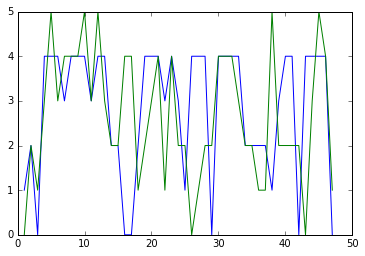

In [41]:
t = pd.Series([0,1,1,3,5,2,3,3,3,5,3,5,2,1,1,3,3,0,2,2,3,1,3,2,1,0,1,2,1,2,2,2,2,1,1,1,1,4,1,1,1,1,0,2,4,3,1])
k = pd.Series([0,2,1,3,5,3,4,4,4,5,3,5,3,2,2,4,4,1,2,3,4,1,4,2,2,0,1,2,2,4,4,4,3,2,2,1,1,5,2,2,2,2,0,3,5,4,1])
df2 = pd.read_csv("vaccines_data_augmented_wot.csv", sep=",",quotechar="\"",header=0,index_col=1)
#print list(df2.iloc[0:48,4::].columns.values)
X = df.iloc[0:48,4::]
#X = pd.DataFrame(df2.trustworthiness.iloc[0:48], columns=['trustworthiness'])
y = k
clf = SGDClassifier(alpha=0.00005, n_iter=1000)
clf.fit(X, y)
scores = cross_validation.cross_val_score(clf, X, y, cv=10)
print numpy.mean(scores)
print df2['trustworthiness'].apply(lambda x:x//20).corr(k)
pl.plot(df2['index'],df2['trustworthiness']//20)
pl.plot(df2['index'],k)
pl.show()

In [116]:
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
regr = linear_model.LinearRegression()
d = pd.read_csv("websci_results.csv", sep=";",quotechar="\"",header=0)
regr.fit(d, df2.trustworthiness)
clf = SGDClassifier(alpha=0.00005, n_iter=1000)
#print pd.DataFrame(regr.coef_*d).sum(axis=1).tolist()
y1 = pd.Series([0.0, 0.82931700117000062, 11.911374325715434, 4.115722047999359, 25.617416449102805, 41.551622004603679, 
     13.706042123387368, 36.699473773648236, 24.788099447932801, 25.617416449102805, 24.788099447932801, 
     25.617416449102805, 29.640247678888244, 0.82931700117000062, 0.82931700117000062, 13.706042123387368, 
     13.706042123387368, -11.082057324545433, 40.722305003433675, 29.640247678888244, 13.706042123387368, 
     8.1385532777848049, 13.706042123387368, 40.722305003433675, 0.82931700117000062, 0.0, 11.911374325715434, 
     20.049927603500237, -2.9435040467606282, 41.551622004603679, 41.551622004603679, 41.551622004603679, 
     29.640247678888244, 0.82931700117000062, 0.82931700117000062, 11.911374325715434, 11.911374325715434, 
     25.617416449102805, 0.82931700117000062, 0.82931700117000062, 21.501694401103443, 0.82931700117000062, 0.0,
     29.640247678888244, 25.617416449102805, 41.551622004603679, 11.911374325715434])
X = df.iloc[0:48,4::]
X = StandardScaler().fit_transform(X)
y1 = StandardScaler().fit_transform(y1)
#X = pd.DataFrame(df2.trustworthiness.iloc[0:48], columns=['trustworthiness'])
y = y1.round()+2
print y
clf = linear_model.SGDRegressor()
clf.fit(X, y)
scores = cross_validation.cross_val_score(clf, X, y, cv=10)
print numpy.mean(scores)
y = k
clf = linear_model.SGDRegressor()
clf.fit(X, y)
scores = cross_validation.cross_val_score(clf, X, y, cv=10)
print numpy.mean(scores)
clf = SGDClassifier(alpha=0.00005, n_iter=1000)
y=d.iloc[:,[0,1]].sum(axis=1)
X = df.iloc[0:48,4::]
clf.fit(X, y)
scores = cross_validation.cross_val_score(clf, X, y, cv=10)
print numpy.mean(scores)

[ 1.  1.  2.  1.  3.  4.  2.  3.  3.  3.  3.  3.  3.  1.  1.  2.  2.  0.
  4.  3.  2.  1.  2.  4.  1.  1.  2.  2.  1.  4.  4.  4.  3.  1.  1.  2.
  2.  3.  1.  1.  2.  1.  1.  3.  3.  4.  2.]
-1.05328831635e+51
-3.26205502228e+50
0.491666666667


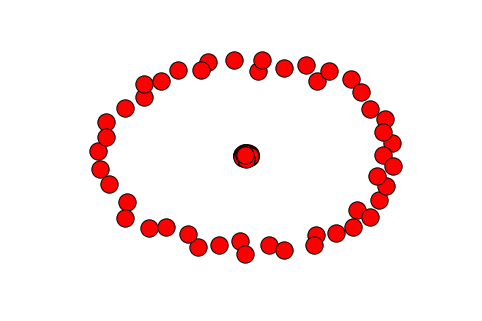

In [30]:
%matplotlib inline

import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import ast

df = pd.read_csv("vaccines_data.csv", sep=",",quotechar="\"",header=0,index_col=1)
#df = df['concepts']
df2 = pd.DataFrame(index=df.index)
df['concepts'] = df['concepts'].apply(lambda x: ast.literal_eval(x))
df['concepts'] = df['concepts'].apply(lambda y: [[x['dbpedia'],x['relevance']] for x in y])
links = []
for i in range(0,df['concepts'].count()):
    for x in df.iloc[i]['concepts']:
        if x[0] in df:
            df[x[0]].iloc[i] = x[1]
        else:
            df[x[0]] = pd.Series([0]*df['concepts'].count(), index=df2.index)
            df[x[0]].iloc[i] = x[1]
            
for x in range(0,len(df.axes[0])):
    for y in range(0,len(df.axes[1])):
        if(df.iloc[x,y]>0):
            for z in range(x+1,len(df.axes[0])):
                if(df.iloc[z,y]>0):
                    links.append({x:z})
                    
G = nx.Graph() #creates a graph

G.add_nodes_from(df2.index)#creates nodes for the graph.
 
for node in links:
    edges = node.items()
    G.add_edge(*edges[0])

G.to_undirected()

nx.draw(G)
plt.show(G)

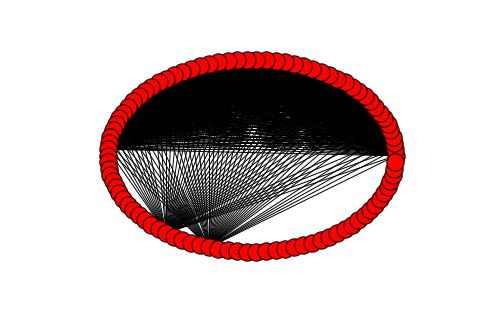

In [34]:
nx.draw_circular(G)
plt.show(G)

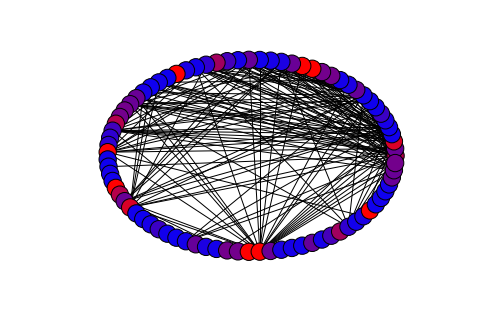

In [16]:
%matplotlib inline

import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import ast

df = pd.read_csv("vaccines_data.csv", sep=",",quotechar="\"",header=0,index_col=1)
df['entities'] = df['entities'].apply(lambda x: ast.literal_eval(x))
df['entities'] = df['entities'].apply(lambda y: [[x['text'],x['relevance']] for x in y])
for i in range(0,df['entities'].count()):
    for x in df.iloc[i]['entities']:
        if x[0] in df:
            df[x[0]].iloc[i] = x[1]
        else:
            df[x[0]] = pd.Series([0]*df['entities'].count(), index=df.index)
            df[x[0]].iloc[i] = x[1]
links = []
for x in range(0,len(df.axes[0])):
    for z in range(x+1,len(df.axes[0])):
        i = 0
        for y in range(0,len(df.axes[1])):
            if(df.iloc[x,y]>0 and df.iloc[z,y]>0):
                    i = i + 1
        if(i>=12):
            links.append({x:z})
                    
G = nx.Graph() #creates a graph

G.add_nodes_from(df.index)#creates nodes for the graph.
 
for node in links:
    edges = node.items()
    G.add_edge(*edges[0])
df2 = pd.read_csv("vaccines_data_augmented_wot.csv", sep=",",quotechar="\"",header=0,index_col=1)
G=G.to_undirected()

nx.draw_circular(G,node_color=[[1.0-x,0,x] for x in df2['trustworthiness']/100],nodesize=200)
plt.show(G)

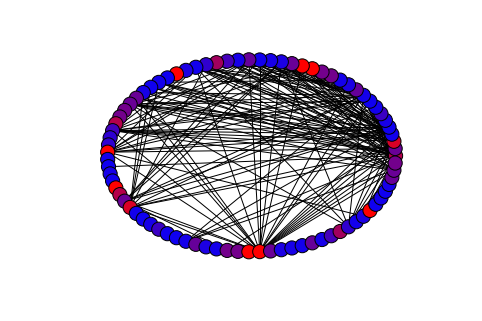

In [22]:
nx.draw_circular(G,node_size=200, node_color=[[1.0-x,0,x] for x in df2['trustworthiness']/100])
plt.show(G)

In [10]:
df2 = pd.read_csv("vaccines_data_augmented_wot.csv", sep=",",quotechar="\"",header=0,index_col=1)
print df2['trustworthiness']/100

url
http://www.ageofautism.com/2015/01/disney-measles-and-the-fantasyland-of-vaccine-perfection.html                                                                           0.29
http://www.naturalnews.com/049351_measles_outbreak_MMR_vaccine_Disneyland.html                                                                                             0.59
http://vaxtruth.org/2015/01/measles/                                                                                                                                       0.15
https://www.sciencebasedmedicine.org/say-it-aint-so-mickey-a-holiday-measles-outbreak-makes-the-happiest-place-in-the-world-sad/                                           0.93
http://www.cdc.gov/mmwr/preview/mmwrhtml/mm6414a1.htm                                                                                                                      0.94
http://www.nydailynews.com/life-style/health/disneyland-measles-outbreak-linked-vaccine-rate-article-1.2151859      

In [23]:
print links

[{0: 1}, {0: 2}, {0: 3}, {0: 4}, {0: 7}, {0: 8}, {0: 9}, {0: 10}, {0: 13}, {0: 16}, {0: 18}, {0: 19}, {0: 21}, {0: 24}, {0: 27}, {0: 29}, {0: 32}, {0: 33}, {0: 34}, {0: 35}, {0: 36}, {0: 37}, {0: 38}, {0: 39}, {0: 40}, {0: 43}, {0: 44}, {0: 45}, {0: 46}, {1: 6}, {1: 10}, {1: 21}, {1: 33}, {1: 34}, {1: 37}, {2: 3}, {2: 4}, {2: 8}, {2: 9}, {2: 10}, {2: 13}, {2: 15}, {2: 18}, {2: 19}, {2: 24}, {2: 27}, {2: 31}, {2: 37}, {2: 38}, {2: 39}, {2: 40}, {2: 44}, {2: 45}, {2: 46}, {3: 4}, {3: 6}, {3: 8}, {3: 9}, {3: 10}, {3: 12}, {3: 19}, {3: 21}, {3: 27}, {3: 28}, {3: 29}, {3: 31}, {3: 32}, {3: 37}, {3: 38}, {3: 39}, {3: 45}, {4: 5}, {4: 6}, {4: 7}, {4: 8}, {4: 9}, {4: 10}, {4: 12}, {4: 19}, {4: 21}, {4: 24}, {4: 27}, {4: 28}, {4: 29}, {4: 32}, {4: 33}, {4: 35}, {4: 37}, {4: 38}, {4: 45}, {4: 46}, {5: 6}, {5: 7}, {5: 9}, {5: 15}, {5: 24}, {5: 28}, {5: 29}, {5: 37}, {6: 9}, {6: 10}, {6: 12}, {6: 18}, {6: 19}, {6: 27}, {6: 28}, {6: 29}, {6: 37}, {7: 8}, {7: 13}, {7: 38}, {8: 9}, {8: 10}, {8: 12}, 

In [25]:
print len(df2.index)

47
